In [64]:
# -*- coding: utf-8 -*-
"""
Created on Mon Mar 14 23:32:19 2022
@author: jagoda
"""

import pandas as pd
import os
import numpy as np


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [65]:
# loading data
df = pd.read_csv("general_data.csv")

### Initial exploration

In [66]:
# some data info 
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [67]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

(4410, 24)

### Dropping irrelevant columns

In [68]:
columns_to_drop = ['EmployeeCount', 'Over18', 'StandardHours']
df.drop(columns_to_drop, axis = 1, inplace = True) 
df.shape

(4410, 21)

### Filling N/As with column means

In [69]:
columns = df.columns
#print(columns)

# for item in columns:
#     print(f'{item} --> {df[item].isna().sum()}')

# missed data in 2 columns --> 1. NumCompaniesWorked, 2. TotalWorkingYears
# # handling N/As
# # # TotalWorkingYears
df['TotalWorkingYears'].fillna(df['TotalWorkingYears'].mean(), inplace=True)
#print(df['TotalWorkingYears'].isna().sum())

# # # NumCompaniesWorked
df['NumCompaniesWorked'].fillna(df['NumCompaniesWorked'].mean(), inplace=True)
#print(df['NumCompaniesWorked'].isna().sum())

# right now I have no missing data in the dataset

In [70]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

### Finding categorical features and their unique values

In [71]:
list_of_categorical_features=df.select_dtypes(include=['category', 'object']).columns
print(list_of_categorical_features)   # 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'

for category_column in list_of_categorical_features:
    print(f'{category_column}\t{df[category_column].unique()}\n')


Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus'],
      dtype='object')
Attrition	['No' 'Yes']

BusinessTravel	['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Department	['Sales' 'Research & Development' 'Human Resources']

EducationField	['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Gender	['Female' 'Male']

JobRole	['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']

MaritalStatus	['Married' 'Single' 'Divorced']



#### Maintaining category features having two possible values

In [72]:
df['Gender'] = df['Gender'].map({'Male': 0,'Female': 1})
df['Attrition'] = df['Attrition'].map({'No': 0,'Yes': 1})
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,1,Healthcare Representative,Married,131160,1.0,11,0,1.000000,6,1,0,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,2,1,1,Research Scientist,Single,41890,0.0,23,1,6.000000,3,5,1,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,3,0,4,Sales Executive,Married,193280,1.0,15,3,5.000000,2,5,0,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,4,0,3,Human Resources,Married,83210,3.0,11,3,13.000000,5,8,7,5
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,5,0,1,Sales Executive,Single,23420,4.0,12,2,9.000000,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,Travel_Rarely,Research & Development,5,4,Medical,4406,1,1,Research Scientist,Single,60290,3.0,17,1,10.000000,5,3,0,2
4406,29,0,Travel_Rarely,Research & Development,2,4,Medical,4407,0,1,Laboratory Technician,Divorced,26790,2.0,15,0,10.000000,2,3,0,2
4407,25,0,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,0,2,Sales Executive,Married,37020,0.0,20,0,5.000000,4,4,1,2
4408,42,0,Travel_Rarely,Sales,18,2,Medical,4409,0,1,Laboratory Technician,Divorced,23980,0.0,14,1,10.000000,2,9,7,8


#### Corelation matrix for numeral features

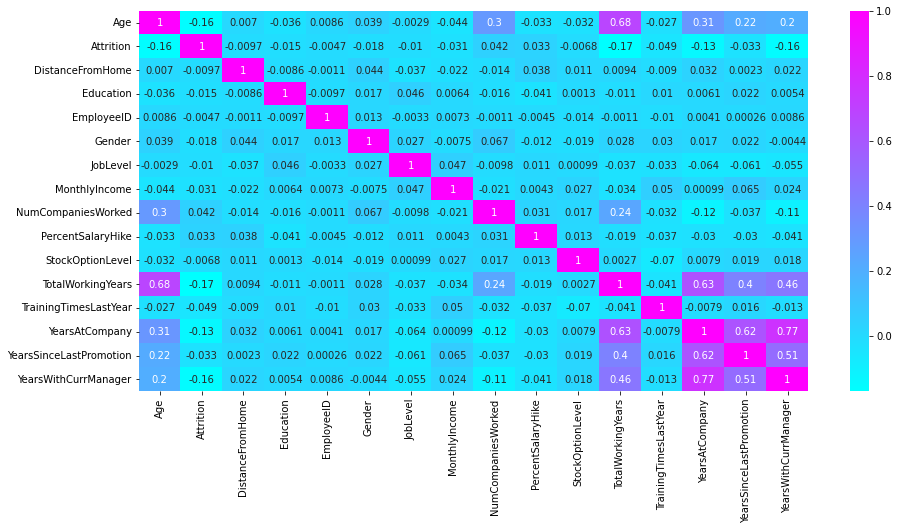

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
figure = plt.figure(figsize=(15, 7))

# calculate the correlation matrix
correlation = df.corr()

# plot the heatmap
sns.heatmap(correlation, annot=True,cmap=plt.cm.cool,
        xticklabels=correlation.columns,
        yticklabels=correlation.columns)

### Getting dummies for categorical columns having more than 2 possible values and merging them with the original dataset

In [74]:
business_travel = pd.get_dummies(df.BusinessTravel, prefix='business_travel')
department = pd.get_dummies(df.Department, prefix='department')
education_field = pd.get_dummies(df.EducationField, prefix='education_field')
job_role = pd.get_dummies(df.JobRole, prefix='job_role')
marital_status = pd.get_dummies(df.MaritalStatus, prefix='marital_status')


df = pd.concat([df, business_travel], axis=1)
df = pd.concat([df, department], axis=1)
df = pd.concat([df, education_field], axis=1)
df = pd.concat([df, job_role], axis=1)
df = pd.concat([df, marital_status], axis=1)

df.drop(['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'], axis = 1, inplace=True)

In [75]:
df.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,business_travel_Non-Travel,business_travel_Travel_Frequently,business_travel_Travel_Rarely,department_Human Resources,department_Research & Development,department_Sales,education_field_Human Resources,education_field_Life Sciences,education_field_Marketing,education_field_Medical,education_field_Other,education_field_Technical Degree,job_role_Healthcare Representative,job_role_Human Resources,job_role_Laboratory Technician,job_role_Manager,job_role_Manufacturing Director,job_role_Research Director,job_role_Research Scientist,job_role_Sales Executive,job_role_Sales Representative,marital_status_Divorced,marital_status_Married,marital_status_Single
0,51,0,6,2,1,1,1,131160,1.0,11,0,1.0,6,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,31,1,10,1,2,1,1,41890,0.0,23,1,6.0,3,5,1,4,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,32,0,17,4,3,0,4,193280,1.0,15,3,5.0,2,5,0,3,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,38,0,2,5,4,0,3,83210,3.0,11,3,13.0,5,8,7,5,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,32,0,10,1,5,0,1,23420,4.0,12,2,9.0,2,6,0,4,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


#### Full correlation

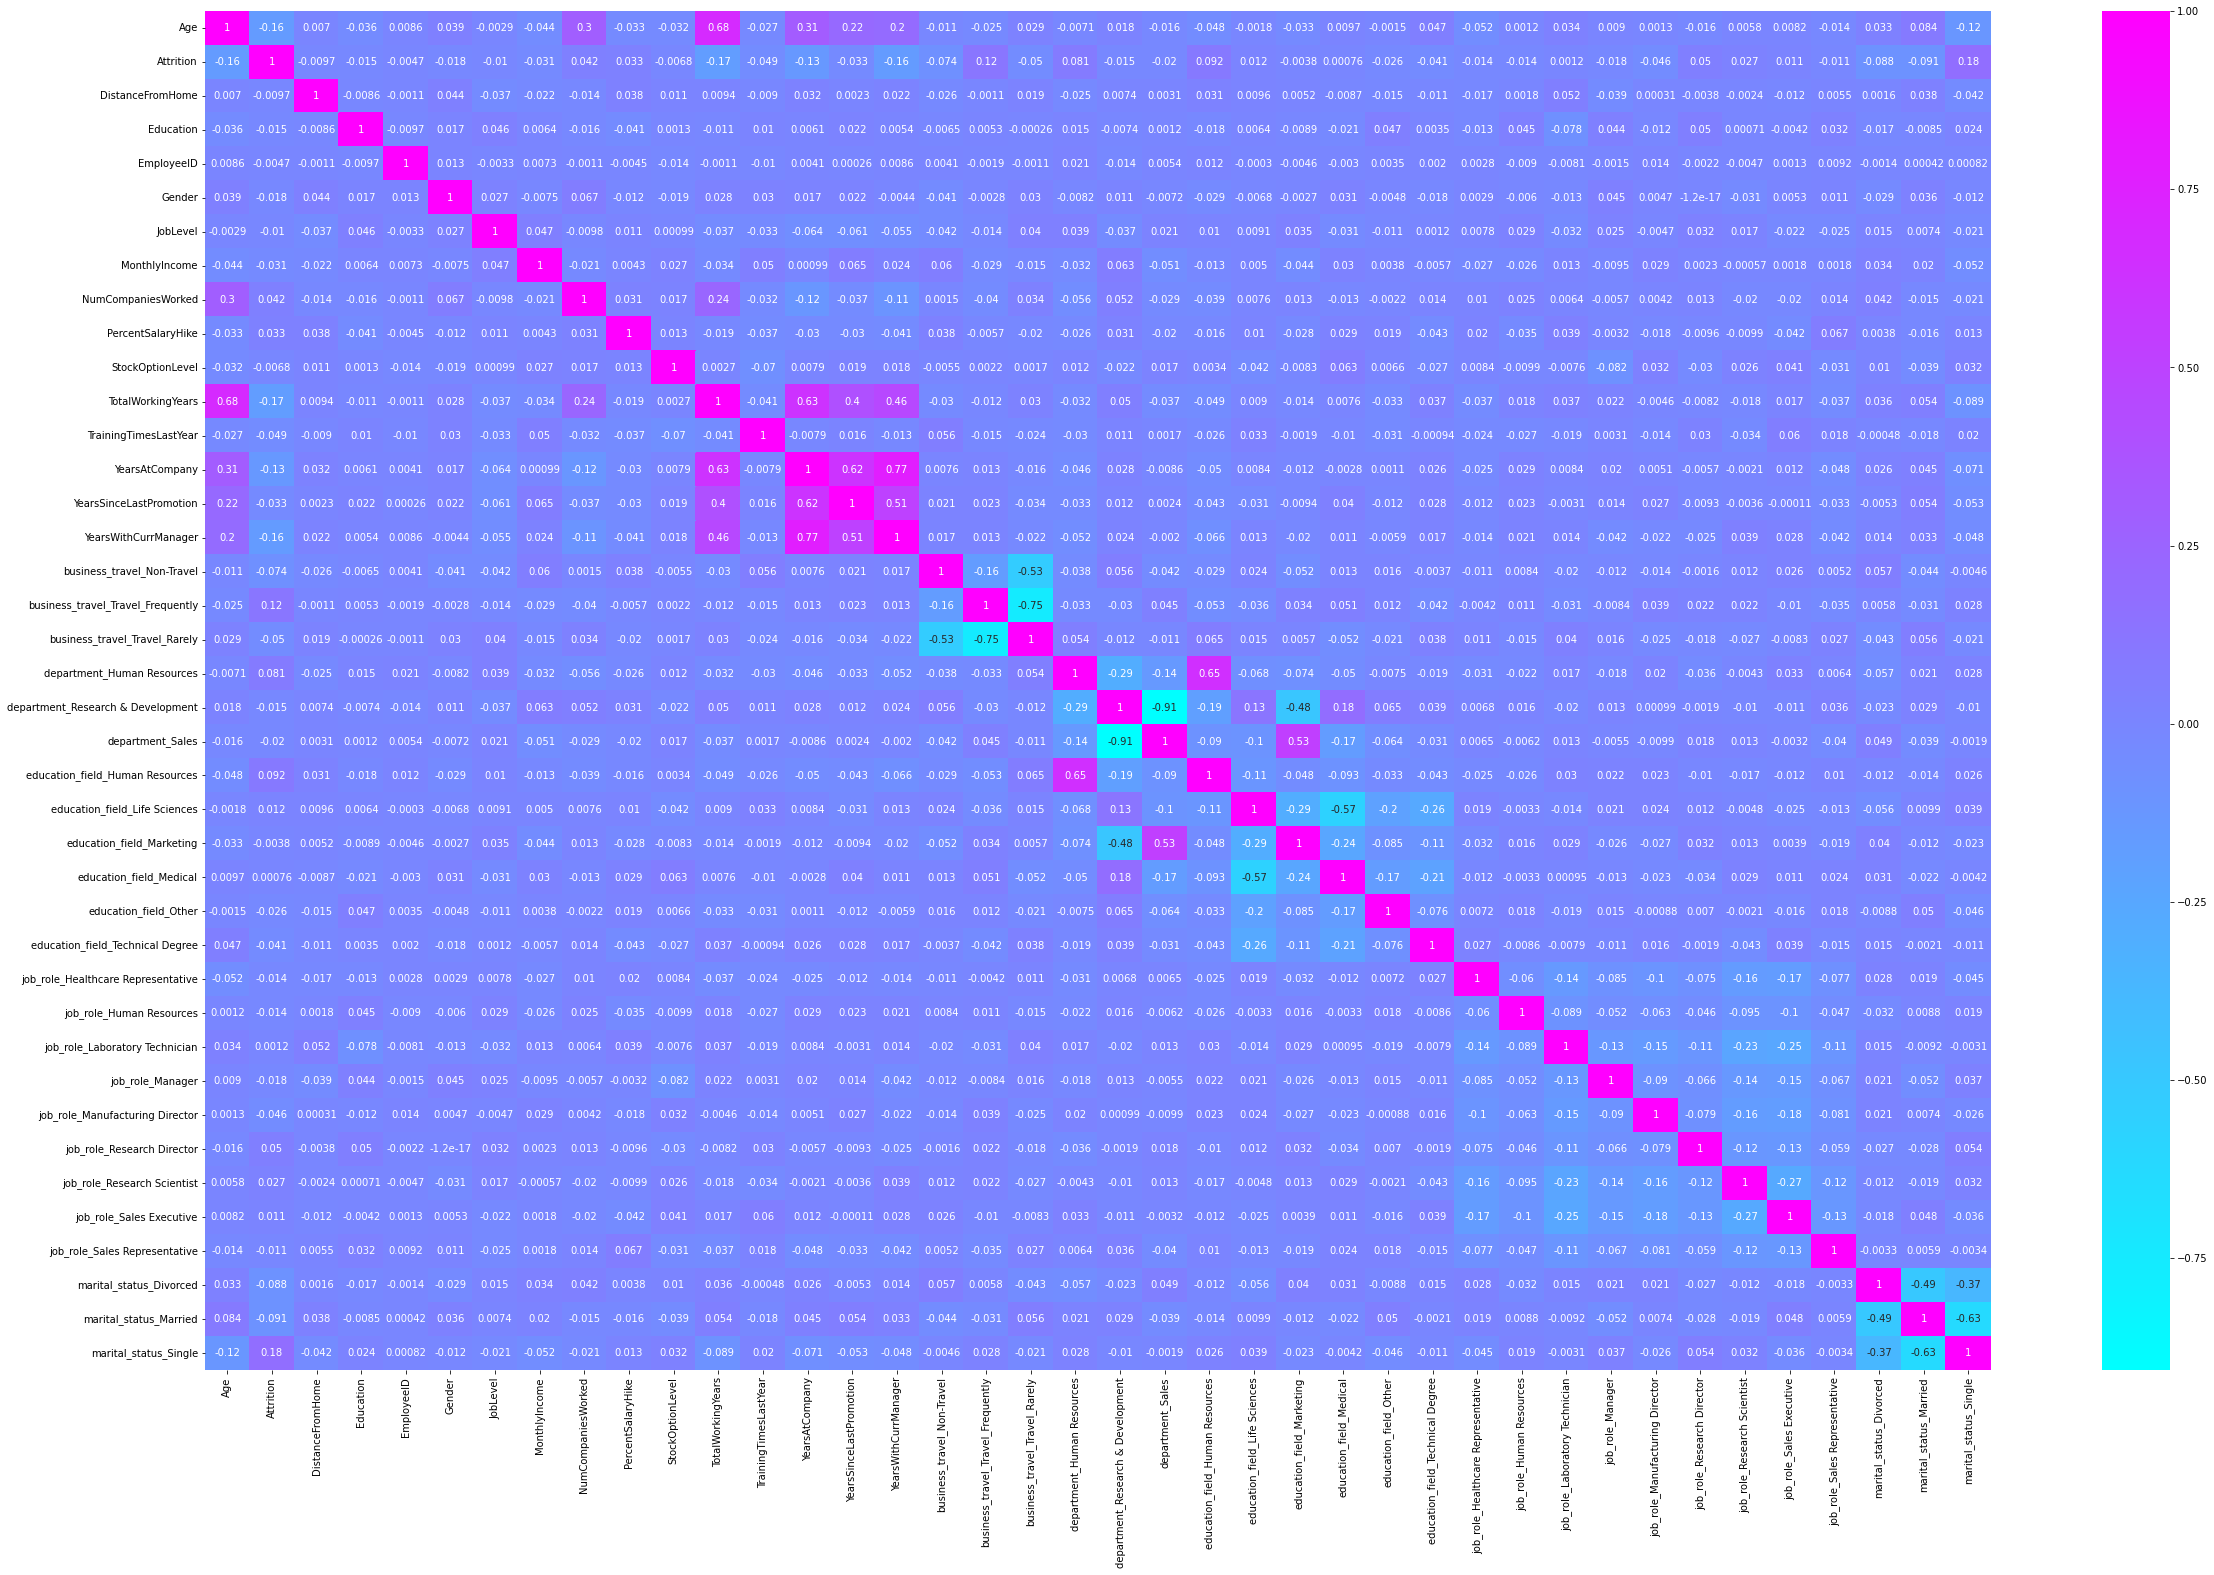

In [76]:
figure1 = plt.figure(figsize=(40, 25))
# calculate the correlation matrix
correlation1 = df.corr()

# plot the heatmap
sns.heatmap(correlation1, annot=True,cmap=plt.cm.cool,
        xticklabels=correlation1.columns,
        yticklabels=correlation1.columns)

In [77]:
corr_with_attrition = df.corrwith(df['Attrition']).sort_values(ascending=False)
corr_with_attrition

Attrition                             1.000000
marital_status_Single                 0.175419
business_travel_Travel_Frequently     0.115143
education_field_Human Resources       0.091573
department_Human Resources            0.080768
job_role_Research Director            0.049760
NumCompaniesWorked                    0.042232
PercentSalaryHike                     0.032533
job_role_Research Scientist           0.027460
education_field_Life Sciences         0.012394
job_role_Sales Executive              0.010869
job_role_Laboratory Technician        0.001179
education_field_Medical               0.000764
education_field_Marketing            -0.003780
EmployeeID                           -0.004729
StockOptionLevel                     -0.006839
DistanceFromHome                     -0.009730
JobLevel                             -0.010290
job_role_Sales Representative        -0.011073
job_role_Healthcare Representative   -0.013768
job_role_Human Resources             -0.013857
Education    

#### Dropping columns to avoid colinearity

In [78]:
cols_to_drop_for_colinearity_removal = ['marital_status_Divorced', 'job_role_Sales Representative', 'education_field_Technical Degree', 'education_field_Other', 'business_travel_Travel_Rarely']
new_df = df.drop(cols_to_drop_for_colinearity_removal, axis=1)
new_df.head()
# 'marital_status_Single'

,Age,Attrition,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,business_travel_Non-Travel,business_travel_Travel_Frequently,department_Human Resources,department_Research & Development,department_Sales,education_field_Human Resources,education_field_Life Sciences,education_field_Marketing,education_field_Medical,job_role_Healthcare Representative,job_role_Human Resources,job_role_Laboratory Technician,job_role_Manager,job_role_Manufacturing Director,job_role_Research Director,job_role_Research Scientist,job_role_Sales Executive,marital_status_Married,marital_status_Single
0,51,0,6,2,1,1,1,131160,1.0,11,0,1.0,6,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1,31,1,10,1,2,1,1,41890,0.0,23,1,6.0,3,5,1,4,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
2,32,0,17,4,3,0,4,193280,1.0,15,3,5.0,2,5,0,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,38,0,2,5,4,0,3,83210,3.0,11,3,13.0,5,8,7,5,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,32,0,10,1,5,0,1,23420,4.0,12,2,9.0,2,6,0,4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1


In [79]:
new_df.dtypes

Age                                     int64
Attrition                               int64
DistanceFromHome                        int64
Education                               int64
EmployeeID                              int64
Gender                                  int64
JobLevel                                int64
MonthlyIncome                           int64
NumCompaniesWorked                    float64
PercentSalaryHike                       int64
StockOptionLevel                        int64
TotalWorkingYears                     float64
TrainingTimesLastYear                   int64
YearsAtCompany                          int64
YearsSinceLastPromotion                 int64
YearsWithCurrManager                    int64
business_travel_Non-Travel              uint8
business_travel_Travel_Frequently       uint8
department_Human Resources              uint8
department_Research & Development       uint8
department_Sales                        uint8
education_field_Human Resources   

In [80]:
new_columns = new_df.columns
new_columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education', 'EmployeeID',
       'Gender', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'business_travel_Non-Travel',
       'business_travel_Travel_Frequently', 'department_Human Resources',
       'department_Research & Development', 'department_Sales',
       'education_field_Human Resources', 'education_field_Life Sciences',
       'education_field_Marketing', 'education_field_Medical',
       'job_role_Healthcare Representative', 'job_role_Human Resources',
       'job_role_Laboratory Technician', 'job_role_Manager',
       'job_role_Manufacturing Director', 'job_role_Research Director',
       'job_role_Research Scientist', 'job_role_Sales Executive',
       'marital_status_Married', 'marital_status_Single'],
      dtype='object')

#### Setting features matrix and target variable

In [81]:
X = new_df.loc[:, new_columns != 'Attrition']
y = new_df['Attrition']

#X = new_df.drop("Attrition", axis=1)
#y = new_df.Attrition

#### Train test split

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [83]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2954, 34), (1456, 34), (2954,), (1456,))

#### Decision tree Classifier

In [84]:
#from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dec_tree = DecisionTreeClassifier(max_depth=6, criterion='gini', random_state=1)

# Fitting
dec_tree.fit(X_train, y_train)

# Predicting
y_pred = dec_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred, normalize=True)
print(f'Decision tree accuracy: {round(accuracy * 100,2)}%')

Decision tree accuracy: 85.78%


#### XGBoost Classifier

In [85]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()

# Fitting
xgb_cl.fit(X_train, y_train)

# Prediction
y_pred = xgb_cl.predict(X_test)

# Score
xgb_accuracy = accuracy_score(y_test, y_pred)
print(f'XGB accuracy: {round(xgb_accuracy * 100,2)}%')

XGB accuracy: 85.78%


#### XGBoost feature importance with eli5

In [86]:
cols = list(X.columns)

In [87]:
import eli5
eli5.show_weights(xgb_cl, feature_names=cols)

Weight,Feature
0.0633,marital_status_Single
0.0572,TotalWorkingYears
0.0511,YearsAtCompany
0.0463,YearsWithCurrManager
0.0417,business_travel_Travel_Frequently
0.0405,education_field_Marketing
0.0393,Age
0.0380,education_field_Human Resources
0.0368,StockOptionLevel
0.0358,NumCompaniesWorked


In [88]:
most_influential = ['marital_status_Single',
'business_travel_Travel_Frequently',
'education_field_Human Resources',
'department_Human Resources']

In [89]:
X1 = new_df.loc[:, most_influential]
y1 = df['Attrition']

In [90]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33, random_state=1)

In [91]:
xgb_cl1 = xgb.XGBClassifier()

# Fitting
xgb_cl1.fit(X_train1, y_train1)

# Prediction
y_pred1 = xgb_cl1.predict(X_test1)

# Score
xgb_accuracy1 = accuracy_score(y_test1, y_pred1)
print(f'XGB accuracy: {round(xgb_accuracy1 * 100,2)}%')

XGB accuracy: 82.97%
